In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
def useless(dataset):
    desc = dataset.describe(percentiles=[], include='all').T
    useless = desc[(desc['std']==0.) | (desc['unique']==1)]
    useless = useless.drop(columns=['count', '50%'])
    return useless

In [4]:
dataset = pd.read_csv('/data_1/evraz/evraz_step_1min.csv')

useless = useless(dataset)

dataset.drop(columns=useless.index, inplace=True)

dataset.drop(columns=['Unnamed: 0', 'index', 'DateTime'], inplace=True)

last_x = dataset.index[-1]

## Descent std

In [13]:
def descent_std_cut(series, max_outs=0.02, step=1, threshold=1.):
    n = len(series)
    
    iname = '' if series.index.name is None else series.index.name
    name = 0 if series.name is None else series.name
    
    series = abs(series - series.median())

    t = series.sort_values(ascending=False).reset_index()

    start = 0
    stop = int(n*max_outs)

    stds = pd.Series([t[name][i:].std() for i in np.arange(start, stop) if i%step==0])
    stds = stds.shift(-1) - stds
    stds = (stds.shift(-1) - stds) / (series.max() - series.median()) * n
    
    if stds.max() is np.nan:
        return 0, None
    
    outlier_estimates = stds[stds > threshold]
    
    if stds.max() < threshold:
        return stds.max(), None

    
    
    t = t.iloc[:outlier_estimates.index[-1] + 1]
    
    t.index = t['index']
    t.index.name = iname
    t = t.drop(columns=['index'])
    return outlier_estimates.iloc[0], t.index

## Compare methods

In [ ]:
1.1 тест весь датасет на выбросы (каждой фиче число)
1.2 где есть выбросы - нарисовать график с подсветкой выбросов оранжевым
return keys = dict{cols : out_index} (out_index это индекс, до которого нид удалять)
2. remove_outliers_apply_interp(dataset, keys)

In [186]:
# col = np.random.choice(dataset.columns)
# col = 'rflotAIM_SFlow_K703_3'
# # col = 'iflotST_K566M4'
# print(col)

cols = [15, 27, 17, 25, 33, 34, 35, 36, 22, 32, 42, 43, 54, 55, 61, 63, 69, 70, 72, 73, 74, 79, 85, 93, 106,
        107, 110, 116, 119, 122, 165, 174, 191, 228, 296, 299, 310, 312] # тестовые колонки
cols = [55] # колонки с несколькими слоями выбросов

for i in cols:
    col = dataset.columns[i]
    seri = dataset[col]

    mean = seri.median()

    print(i)
    print(seri.min(), seri.max())
    
    # method
    cut_data = descent_std_cut(seri)

    if cut_data is None:
        cut_data = seri

    cut_down = cut_data.min()
    cut_up = cut_data.max()

    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    seri.plot(ax=ax[0])
    ax[0].plot([0, last_x], [mean]*2, c='k', ls='--')  # mean
    ax[0].plot([0, last_x], [cut_down]*2, c='g', ls=':')
    ax[0].plot([0, last_x], [cut_up]*2, c='r', ls=':')
    ax[0].set_title('%s : %f %f'%('descent_std_cut', cut_down, cut_up))
    cut_data.plot(ax=ax[1])
    plt.show()

55
0.0 2.70000004768372


AttributeError: 'tuple' object has no attribute 'min'

## 1. Пробежаться по датасету (возвращать метрику и индексы outliers)

In [14]:
def estimate_outliers(dataset):
    estimates = pd.DataFrame()
    outliers_dict = {}

    for col in dataset_t.columns:
        print(col)
        seri = dataset_t[col]
        estimate, outliers = descent_std_cut(seri, threshold=1.)


        if outliers is not None:
            plt.figure()
            seri.plot(c='C1')
            seri_without_outliers = seri.drop(index=outliers)    
            seri_without_outliers.plot(c='C0')
        plt.show()

        estimates[col] = [estimate]
        outliers_dict[col] = outliers

        print(estimate)
        print('\n')

    estimates.index = ['descent_std']
    estimates = estimates.T
    return estimates, outliers_dict

gk3AIM_AmperG_K161
0.260973693000038


gk3AIM_Speed_K189
0.38863697603177894


gk3AIM_Den_DPITK161


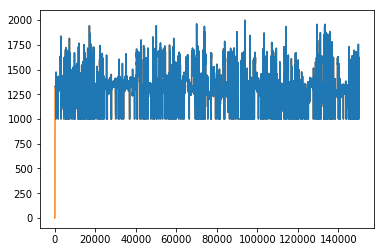

3.9641364605591423


gk3AIM_Speed_K185


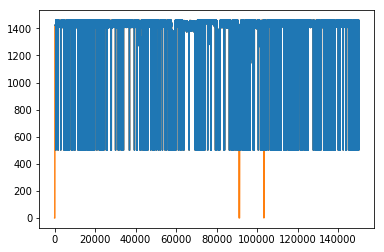

1.5198723761209565


gk3AOM_CSpeed_K185


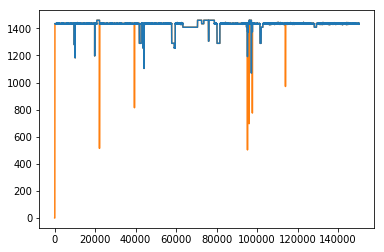

14.548851124791724


gk3AOM_CSpeed_K187


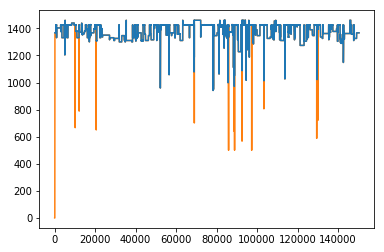

16.47613725648732


gk3AOM_CSpeed_K189


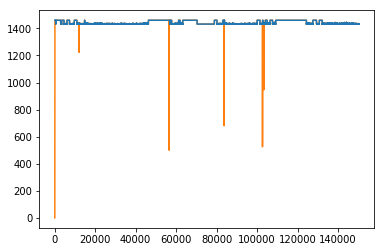

28.58030024987846


gk3AOM_CSpeed_K191


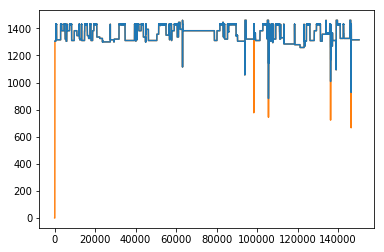

19.0299720142712


gk3AIM_Lev_K191A
0.08738474747115506


gk3AIM_VlvPos_K191A
0.801297819900671


gk3AOM_VlvAct_K191A
0.0838890075760247


gk3MBM_Curr_K185


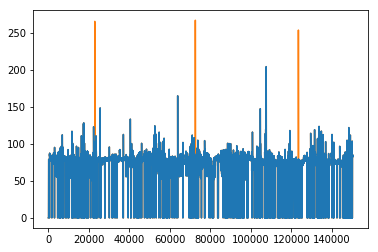

1.7551767778042324


gk3RR_CMD_K191A
0.08390841367426646


gk3RR_KP_K185A


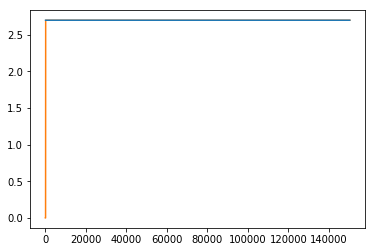

387.7963865756003


gk3RR_SP_K189A


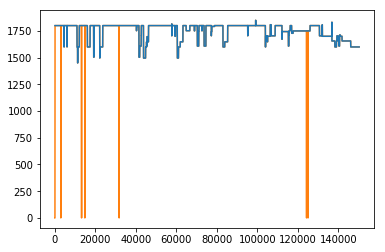

11.212248015280807


gk3RR_TD_K185A
-4.277223415902753e-05


gk3SIM_DP_K163
-1.0756277212700782e-05


IdCoal
-3.214081895447363e-05


iflotST_K565M1
-9.051187080066914e-05


iflotST_K565M10


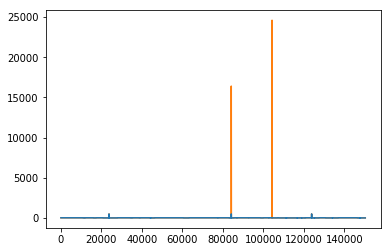

214.51787074453736


iflotST_K565M2
-9.05118958324791e-05


iflotST_K565M7


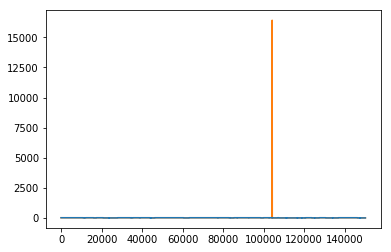

324.8757718157261


iflotST_K566M2


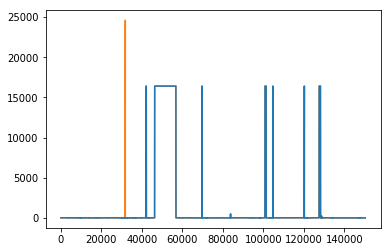

1.4427599640746294


iflotST_K701_1
-8.629505736914214e-05


ir4eST_K619


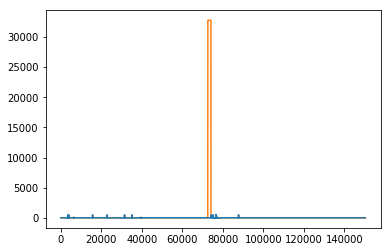

360.6854062170881


ir4eST_K623


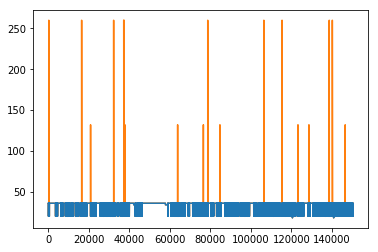

27.19570904746398


m3AIM_Amper_K350


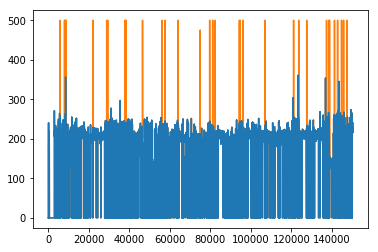

1.402925598327829


m3AIM_Amper_K375


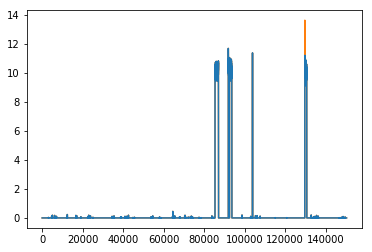

1.055304241220928


m3AIM_Amper_K378


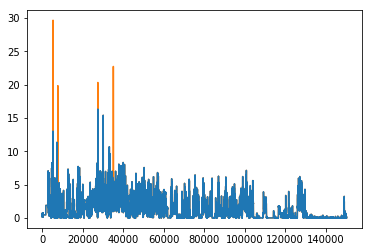

1.3315798419181737


m3AIM_BRT1_K392


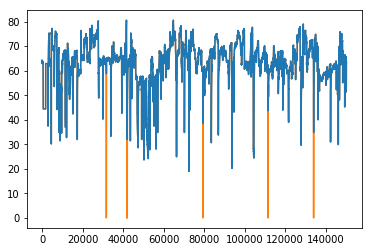

2.6460917094319263


m3AIM_PosK_K372A


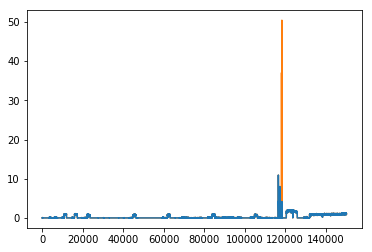

18.30747531375045


m3AIM_Q_K422B


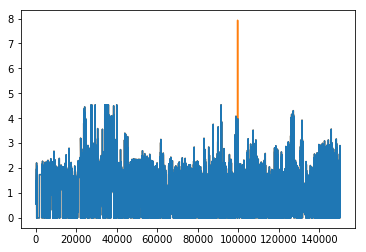

5.040404389199374


m3AIM_RO_K416A


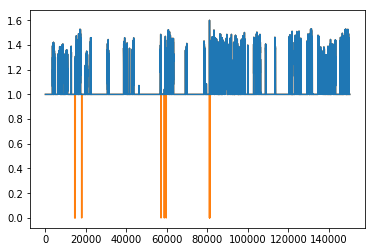

2.579185755886276


m3RR_KP_K356A
-0.0003058851742970085


rflotAIM_Flow_K701_4


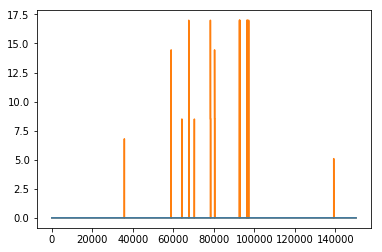

4.479919069656861


rflotAIM_Flow_K703_3


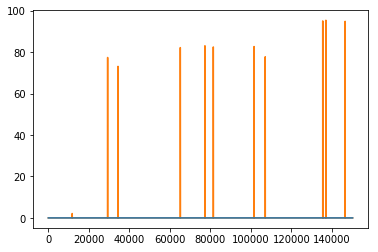

6.353666234444879


rflotAIM_SFlow_K701_1


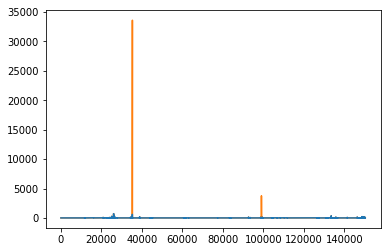

315.22746286431686


rflotAIM_SFlow_K701_3


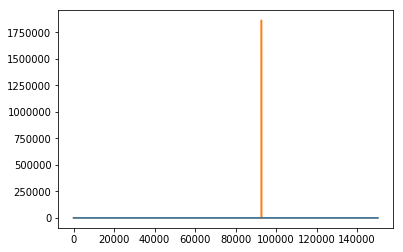

386.9611905156151




In [15]:
dataset_t = dataset[dataset.columns[[15, 27, 17, 25, 33, 34, 35, 36, 22, 32, 42, 43, 54, 55, 61, 63, 69, 70, 72, 73, 74, 79, 85, 93, 106,
        107, 110, 116, 119, 122, 165, 174, 191, 228, 296, 299, 310, 312]]]
estimates, outliers_dict = estimate_outliers(dataset_t)

In [8]:
estimates

,descent_std
gk3AIM_AmperG_K161,2.325516
gk3AIM_Speed_K189,0.388637
gk3AIM_Den_DPITK161,0.161829
gk3AIM_Speed_K185,0.000713
gk3AOM_CSpeed_K185,-0.000001
gk3AOM_CSpeed_K187,-0.000014
gk3AOM_CSpeed_K189,0.000002
gk3AOM_CSpeed_K191,0.226746
gk3AIM_Lev_K191A,0.087358
gk3AIM_VlvPos_K191A,0.790522


In [178]:
outliers_dict['gk3RR_KP_K185A']

Int64Index([150310,  50141,  50157,  50156,  50155,  50154,  50153,  50152,
             50151,  50150,
            ...
             47203,  47202,  47201,  47200,  47199,  47197,  47190,  47196,
             47195,  47194],
           dtype='int64', name='', length=3004)

In [169]:
def fill_outliers(dataset, outliers_dict, method='ffill'):
    dataset = dataset.copy()
    for col in outliers_dict.keys():
        if outliers_dict[col] is None:
            continue
        dataset[col][outliers_dict[col]] = np.NaN
        dataset[col].fillna(method=method, inplace=True)
    return dataset

In [210]:
dt = fill_outliers(dataset_t, outliers_dict)

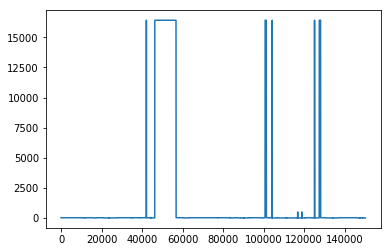

In [12]:
col ='iflotST_K565M1'
dataset_t[col].plot()